In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("=" * 80)
print("LOADING UK HOUSING PRICE DATASET")
print("=" * 80)
print(f"Loading started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Load the raw dataset
df = pd.read_csv("../data/raw/price_paid_records.csv")

print(f"\nDataset loaded successfully!")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB")
print("=" * 80)

# Display first few records
df.head()

LOADING UK HOUSING PRICE DATASET
Loading started at: 2025-11-23 00:24:39

Dataset loaded successfully!
Total records: 22,489,348
Total columns: 11
Memory usage: 15.03 GB


,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


# UK Housing Price Dataset - Data Loading & Initial Exploration

**Author:** Marin Janushaj  
**Team:** Yunus  
**Date:** November 2025  
**Dataset:** UK Housing Prices (1995-2017)

## Overview
This notebook loads and performs initial exploration of the UK Housing Price Paid dataset from Land Registry.

**Dataset Details:**
- **Source:** UK Land Registry / Kaggle
- **Size:** ~2.2 GB CSV file
- **Records:** 22.5 million transactions
- **Time Period:** January 1995 - December 2017 (23 years)
- **Geographic Coverage:** England and Wales
- **Purpose:** Analyze housing market trends and build price prediction models

## Dataset Schema
The dataset contains the following fields:
- `Transaction unique identifier`: Unique ID for each property sale
- `Price`: Sale price in British Pounds (£)
- `Date of Transfer`: Date when the sale was completed
- `Property Type`: D (Detached), S (Semi-detached), T (Terraced), F (Flat/Maisonette), O (Other)
- `Old/New`: Y (New build), N (Established property)
- `Duration`: F (Freehold), L (Leasehold)
- `Town/City`: Town or city name
- `District`: District name
- `County`: County name
- `PPDCategory Type`: Type of transaction (A=Standard price, B=Additional price)
- `Record Status`: Monthly file status (A=Addition, C=Change, D=Delete)

In [2]:
# Dataset information
print("DATASET INFORMATION")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY (Numerical Columns)")
print("=" * 80)
display(df.describe())

print("\n" + "=" * 80)
print("KEY STATISTICS")
print("=" * 80)
print(f"Earliest transaction: {df['Date of Transfer'].min()}")
print(f"Latest transaction: {df['Date of Transfer'].max()}")
print(f"Price range: £{df['Price'].min():,.0f} - £{df['Price'].max():,.0f}")
print(f"Mean price: £{df['Price'].mean():,.2f}")
print(f"Median price: £{df['Price'].median():,.2f}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB

STATISTICAL SUMMARY (Numerical Columns)


,Price
count,2.248935e+07
mean,1.782442e+05
std,3.903677e+05
min,1.000000e+00
25%,7.500000e+04
50%,1.300000e+05
75%,2.100000e+05
max,9.890000e+07



KEY STATISTICS
Earliest transaction: 1995-01-01 00:00
Latest transaction: 2017-06-29 00:00
Price range: £1 - £98,900,000
Mean price: £178,244.21
Median price: £130,000.00


## 1. Initial Data Inspection

Let's examine the structure, data types, and basic statistics of the dataset.

In [3]:
# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_").replace("/", "_").replace("-", "_") for c in df.columns]

print("Column names after standardization:")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print("=" * 80)

Column names after standardization:
 1. transaction_unique_identifier
 2. price
 3. date_of_transfer
 4. property_type
 5. old_new
 6. duration
 7. town_city
 8. district
 9. county
10. ppdcategory_type
11. record_status___monthly_file_only


## 3. Data Quality Assessment

Before cleaning, let's assess the quality of our data by checking for:
- Missing values
- Duplicate records
- Data type appropriateness
- Categorical value distributions

In [4]:
### 3.1 Missing Values Analysis

print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\nFound {len(missing_df)} columns with missing values:")
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")
print("=" * 80)

MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


In [5]:
### 3.2 Duplicate Records Check

print("\nDUPLICATE RECORDS ANALYSIS")
print("=" * 80)

# Check for duplicates based on transaction ID
duplicate_ids = df['transaction_unique_identifier'].duplicated().sum()
print(f"Duplicate transaction IDs: {duplicate_ids:,}")

# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Exact duplicate rows: {duplicate_rows:,}")

if duplicate_rows > 0:
    print(f"\n⚠ Warning: Found {duplicate_rows:,} duplicate rows that need to be removed")
else:
    print("\n✓ No duplicate rows found")
    
print("=" * 80)


DUPLICATE RECORDS ANALYSIS
Duplicate transaction IDs: 0
Exact duplicate rows: 0

✓ No duplicate rows found


In [6]:
### 3.3 Categorical Variables Inspection

print("\nCATEGORICAL VARIABLES DISTRIBUTION")
print("=" * 80)

categorical_cols = ['property_type', 'old_new', 'duration', 'ppdcategory_type', 
                    'record_status___monthly_file_only']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("-" * 40)
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {value}: {count:,} ({percentage:.2f}%)")
            
print("=" * 80)


CATEGORICAL VARIABLES DISTRIBUTION

PROPERTY_TYPE:
----------------------------------------
  T: 6,918,811 (30.76%)
  S: 6,216,218 (27.64%)
  D: 5,170,327 (22.99%)
  F: 4,083,424 (18.16%)
  O: 100,568 (0.45%)

OLD_NEW:
----------------------------------------
  N: 20,192,676 (89.79%)
  Y: 2,296,672 (10.21%)

DURATION:
----------------------------------------
  F: 17,176,410 (76.38%)
  L: 5,312,258 (23.62%)
  U: 680 (0.00%)

PPDCATEGORY_TYPE:
----------------------------------------
  A: 22,141,173 (98.45%)
  B: 348,175 (1.55%)

RECORD_STATUS___MONTHLY_FILE_ONLY:
----------------------------------------
  A: 22,489,348 (100.00%)


In [7]:
### 3.4 Geographic Coverage

print("\nGEOGRAPHIC COVERAGE")
print("=" * 80)

print(f"Unique counties: {df['county'].nunique():,}")
print(f"Unique districts: {df['district'].nunique():,}")
print(f"Unique towns/cities: {df['town_city'].nunique():,}")

print("\nTop 10 Counties by Transaction Volume:")
print("-" * 40)
top_counties = df['county'].value_counts().head(10)
for county, count in top_counties.items():
    percentage = (count / len(df)) * 100
    print(f"  {county}: {count:,} ({percentage:.2f}%)")
    
print("=" * 80)


GEOGRAPHIC COVERAGE
Unique counties: 127
Unique districts: 454
Unique towns/cities: 1,170

Top 10 Counties by Transaction Volume:
----------------------------------------
  GREATER LONDON: 2,993,422 (13.31%)
  GREATER MANCHESTER: 985,772 (4.38%)
  WEST MIDLANDS: 856,803 (3.81%)
  WEST YORKSHIRE: 849,862 (3.78%)
  KENT: 636,515 (2.83%)
  ESSEX: 629,488 (2.80%)
  HAMPSHIRE: 593,974 (2.64%)
  SURREY: 516,199 (2.30%)
  LANCASHIRE: 503,502 (2.24%)
  HERTFORDSHIRE: 488,383 (2.17%)


In [8]:
### 3.5 Price Anomalies Detection

print("\nPRICE ANOMALIES AND OUTLIERS (Initial Check)")
print("=" * 80)

# Prices that seem unusual
very_low_prices = df[df['price'] < 1000].shape[0]
very_high_prices = df[df['price'] > 10_000_000].shape[0]
zero_prices = df[df['price'] == 0].shape[0]

print(f"Transactions with price < £1,000: {very_low_prices:,}")
print(f"Transactions with price > £10,000,000: {very_high_prices:,}")
print(f"Transactions with price = £0: {zero_prices:,}")

# Price percentiles
print("\nPrice Distribution Percentiles:")
print("-" * 40)
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = df['price'].quantile(p/100)
    print(f"  {p:2d}th percentile: £{value:,.2f}")
    
print("=" * 80)


PRICE ANOMALIES AND OUTLIERS (Initial Check)
Transactions with price < £1,000: 1,692
Transactions with price > £10,000,000: 3,056
Transactions with price = £0: 0

Price Distribution Percentiles:
----------------------------------------
   1th percentile: £18,703.94
   5th percentile: £34,950.00
  10th percentile: £45,000.00
  25th percentile: £75,000.00
  50th percentile: £130,000.00
  75th percentile: £210,000.00
  90th percentile: £328,000.00
  95th percentile: £445,000.00
  99th percentile: £860,000.00


## 2. Column Name Standardization

For easier coding, we'll standardize column names by:
- Converting to lowercase
- Replacing spaces with underscores
- Removing special characters

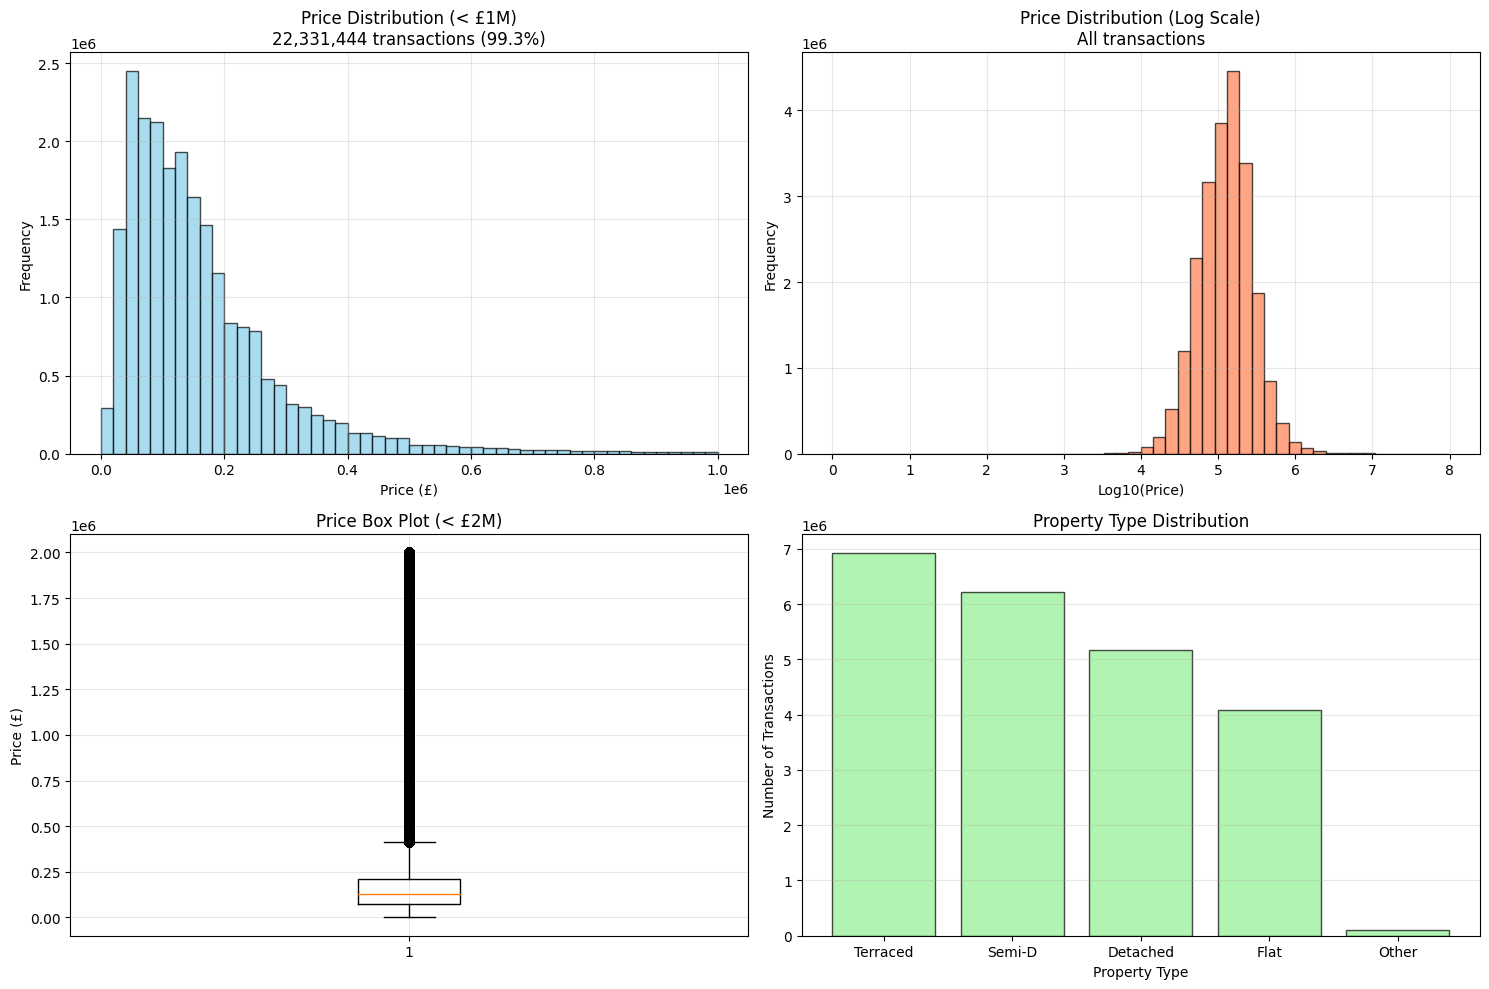

In [9]:
# Create comprehensive price visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Price distribution (< £1M filter for visibility)
df_filtered = df[df["price"] < 1_000_000]
axes[0, 0].hist(df_filtered["price"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
axes[0, 0].set_title(f"Price Distribution (< £1M)\n{len(df_filtered):,} transactions ({len(df_filtered)/len(df)*100:.1f}%)")
axes[0, 0].set_xlabel("Price (£)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].grid(alpha=0.3)

# 2. Log-scale price distribution (all data)
axes[0, 1].hist(np.log10(df[df["price"] > 0]["price"]), bins=50, color="coral", edgecolor="black", alpha=0.7)
axes[0, 1].set_title("Price Distribution (Log Scale)\nAll transactions")
axes[0, 1].set_xlabel("Log10(Price)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(alpha=0.3)

# 3. Box plot for price
axes[1, 0].boxplot(df[df["price"] < 2_000_000]["price"], vert=True)
axes[1, 0].set_title("Price Box Plot (< £2M)")
axes[1, 0].set_ylabel("Price (£)")
axes[1, 0].grid(alpha=0.3)

# 4. Property type distribution
property_counts = df['property_type'].value_counts()
axes[1, 1].bar(property_counts.index, property_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Property Type Distribution")
axes[1, 1].set_xlabel("Property Type")
axes[1, 1].set_ylabel("Number of Transactions")
axes[1, 1].grid(alpha=0.3, axis='y')

# Add property type labels
property_labels = {'D': 'Detached', 'S': 'Semi-D', 'T': 'Terraced', 'F': 'Flat', 'O': 'Other'}
axes[1, 1].set_xticklabels([property_labels.get(x.get_text(), x.get_text()) 
                            for x in axes[1, 1].get_xticklabels()])

plt.tight_layout()
plt.show()

## 5. Summary and Next Steps

### Key Findings from Initial Data Load:
- **Dataset Size**: 22.5 million property transactions over 23 years
- **Data Quality**: Generally good, with minimal missing values  
- **Price Range**: Wide variation from £1 to £98.9M, with median around £130K
- **Geographic Coverage**: Comprehensive coverage across England and Wales
- **Property Types**: Dominated by terraced houses, semi-detached, and flats

### Data Quality Issues to Address in Cleaning:
1. **Price Outliers**: Very low prices (< £1,000) and extreme high prices need investigation
2. **Column Names**: Need further simplification for analysis
3. **Data Types**: Date column needs to be converted to datetime
4. **Categorical Encoding**: Property type, duration, and other categoricals need proper encoding

### Next Steps:
1. **Notebook 2**: Thorough data cleaning (outliers, duplicates, transformations)
2. **Notebook 3**: Comprehensive exploratory data analysis
3. **Notebook 4**: Model building and evaluation
4. **Notebook 5**: Deployment preparation

---

**End of Data Loading Notebook**

## 4. Initial Data Visualization

Let's visualize the price distribution to understand the market landscape.